In [1]:
#Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

from sklearn.base import BaseEstimator, TransformerMixin # base classes (provide common functionality and methods for all transformers and estimators)
from sklearn.impute import SimpleImputer # completing/replacing missing values
from sklearn.preprocessing import OneHotEncoder # Machine Learning (One Hot Encoder Categorical Attributes)
from sklearn.preprocessing import StandardScaler # Machine Learning (Scaling data) - Z-Score Normalization)
from sklearn.pipeline import Pipeline # Machine Learning (Pipeline class for numerical features)
from sklearn.compose import ColumnTransformer # Machine Learning (Transformation of: numerical features + categorical attributes)

from sklearn.linear_model import LogisticRegression # Machine Learning (Logistic Regression)

<div class="alert alert-block alert-warning"><b>Point 0, 1, 2 and 3:</b> In following steps we are going to apply several tehcniques, methods or procedures to check and assess the training dataset. Furthermore, in these stages we are not going to modify or edit the training dataset.</div>

# __0. Important__

Type of machine learning system to build:

1. Supervised Learning
2. Batch Learning (also called "offline learning")
3. Model-based learning

# __1. Loading the Data - Training Dataset__

In [2]:
training_data = pd.read_csv("data/train.csv")

# __2. Exploratory Data Analysis (EDA) - Training Dataset__

In [3]:
training_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False



  Shape of the dataframe:  (891, 12) 

  Head of the dataframe:  

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C12

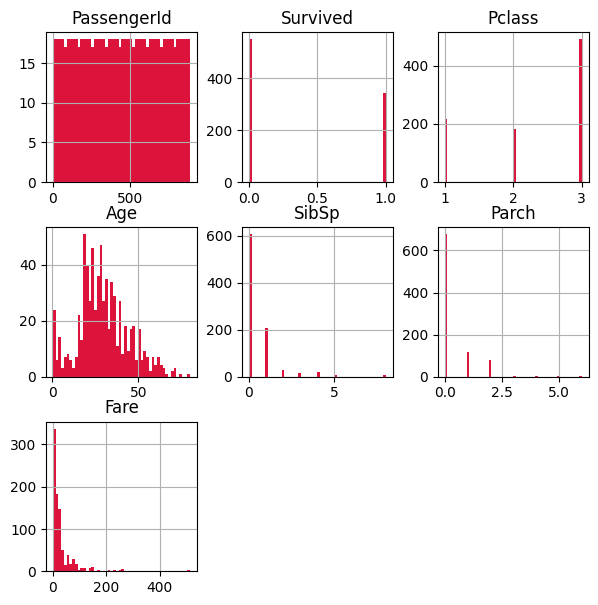


  Boxplots for the numerical columns: 



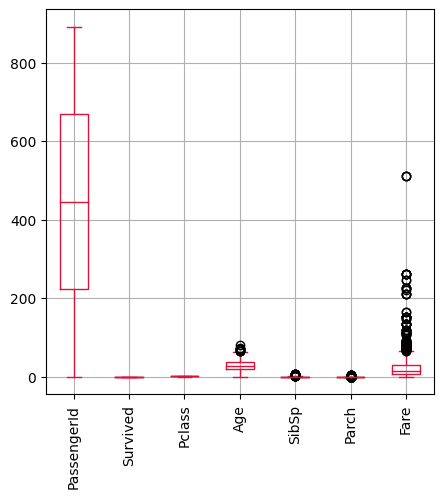


  Standard Correlation Coefficient of the numerical columns: 

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  

  Correlation matrix for the numerical columns: 



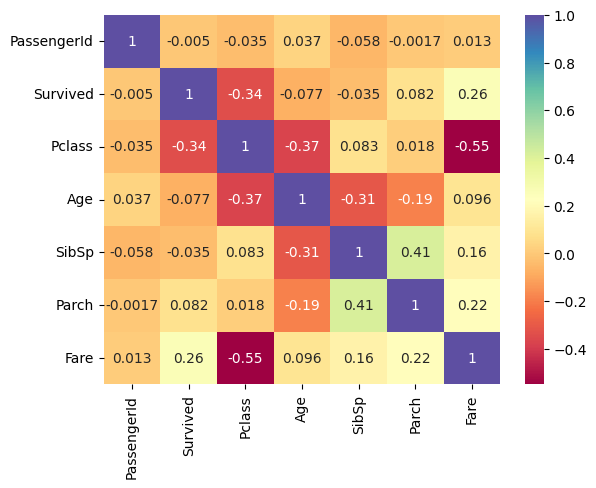

In [4]:
def EDA(training_data):  
    # Print the "shape" of the dataframe
    # '\033[1m' : folliwing text BOLD
    # '\033[94m' : following text BLUE
    # '\033[0m' : reset the font style
    print("\n" +'\033[1m','\033[94m',"Shape of the dataframe:",'\033[0m', training_data.shape, "\n")
    
    # Print the "head" of the dataframe
    print('\033[1m','\033[94m',"Head of the dataframe:",'\033[0m', "\n")
    print(training_data.head())

    # Print the "general information" of the dataframe
    print("\n", '\033[1m','\033[94m',"Information of the dataframe:",'\033[0m', "\n")
    training_data.info()

    # Print the "number and percentage" of missing values per column" of the dataframe
    print("\n" +'\033[1m','\033[94m', "Number and percentage of missing values per column:", '\033[0m' + "\n")
    missing = training_data.isnull().sum()
    percent = missing / training_data.shape[0] * 100
    print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))

    # Print the "summary statistics of the numerical columns" of the dataframe
    print("\n" +'\033[1m','\033[94m', "Summary statistics of the numerical columns:", '\033[0m' + "\n")
    print(training_data.describe())  

    # Plot "histograms for the numerical columns" of the dataframe
    print("\n" +'\033[1m','\033[94m',"Histograms for the numerical columns:", '\033[0m' + "\n")
    training_data.hist(bins= 50, figsize=(7,7),color= "Crimson")
    plt.show()  

    # Plot "boxplots for the numerical columns" of the dataframe
    print("\n" +'\033[1m','\033[94m',"Boxplots for the numerical columns:", '\033[0m' + "\n")
    training_data.boxplot(figsize=(5,5), rot=90, color= "Crimson")
    plt.show()

    # Print the "Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of the numerical columns" of the dataframe
    print("\n" +'\033[1m','\033[94m', "Standard Correlation Coefficient of the numerical columns:", '\033[0m' + "\n")
    print(training_data.corr())    

    # Plot "heatmap of the Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of the numerical columns" of the dataframe
    print("\n" +'\033[1m','\033[94m', "Correlation matrix for the numerical columns:", '\033[0m' + "\n")
    corr = training_data.corr()
    sns.heatmap(corr, annot = True, cmap="Spectral")
    plt.show()
    
# Call the function
EDA(training_data)

# __3. Conclusions of the EDA - Training Dataset__

__The assessment of the previous outputs allows us to describe the following__:

1. The "Standard Correlation Coefficient" (table and graph) shows us two (2) features that have high correlations with the target variable (i.e. "Survived"). Those features are: 

> "Pclass"

> "Fare"

2. The "Standard Correlation Coefficient" (table and graph) shows us two (2) features that have high correlations with the feature "Pclass". Those features are: 

> "Fare"

> "Age"

3. The "Standard Correlation Coefficient" (table and graph) shows us one (1) feature that have high correlation with the feature "Age". This features is: 

> "SibSp"

4. The "Standard Correlation Coefficient" (table and graph) shows us one (1) feature that have high correlation with the feature "SibSp". This features is: 

> "Parch"

5. The training dataset has interesting categorical attributes such as "Sex" (data type: object) and "Pclass" (data type: int64) which have several categories.

6. The "Boxplots for the numerical columns", "Histograms for the numerical columns" and "Summary statistics of the numerical columns" show us that it will be necessary to apply "Feature Scaling" in some numerical attributes. 

> For instance, we can see that the mean values of features such as "Fare" and "Age" are much larger than the mean value of the feature "Pclass".

> The histograms of the features "Fare" and "Age" looks like tail-heavy.

7. The "Information of the dataframe" shows us that it will be necessary to deal with "Null Values" in feature "Age".

__Data Dictionary__:

1. Survived (0 = No, 1 = Yes)

2. Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

3. Sex (male, female)

4. Age (years)

5. SibSp: number of siblings / spouses aboard the Titanic.
 
6. Parch: number of parents / children aboard the Titanic.

> Some children travelled only with a nanny, therefore "Parch = 0" for them.

7. Ticket: ticket number

8. Fare: passenger fare

9. Cabin: cabin number

10. Embarked (Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton))

### __Tips #1__

In [5]:
#The code '\033[1m' and '\033[0m' allows me:
    #Use bold text in the printed text {inside the function print()}    
    
#The code '\033[94m' allows me:
    #Use the color blue in the printed text {inside the function print()}    
    
#The code "\n" allows me to a:
    #Line break   

<div class="alert alert-block alert-danger"><b>Points from 4 to 10:</b> In the following steps, we are going to apply several techniques, methods, or procedures to modify or edit the training dataset. To be specific, we will focus on the most interesting and relevant features of the training set.</div>

# __4. Visualize the Data - Training Dataset__

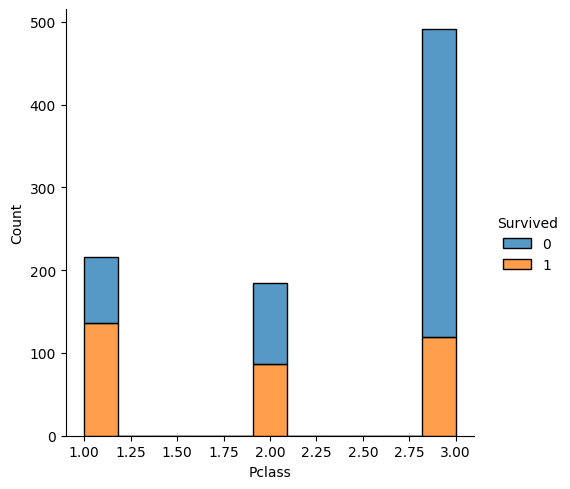

In [6]:
    #stat : could be {“count”, “frequency”, “probability”, “percent”, "density"} 
        #Aggregate statistic to compute in each bin.

    #multiple: could be {“layer”, “dodge”, “stack”, “fill”}

sns.displot(training_data, x="Pclass", hue="Survived", multiple="stack",stat = "count")

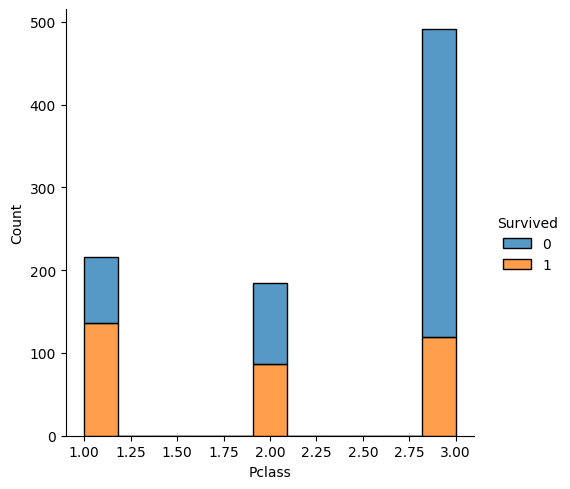

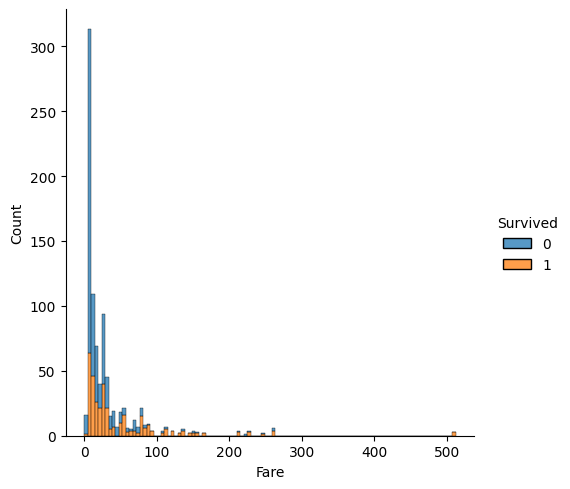

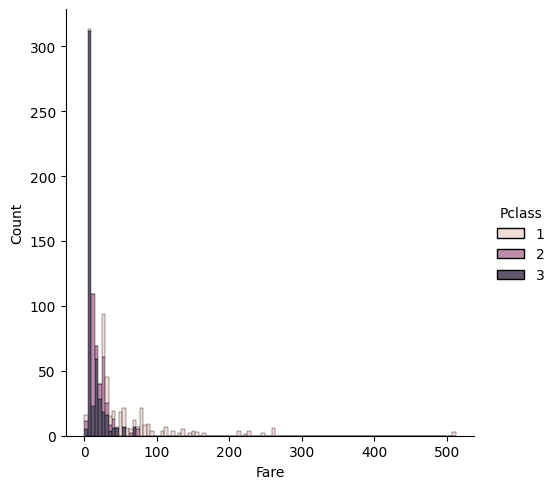

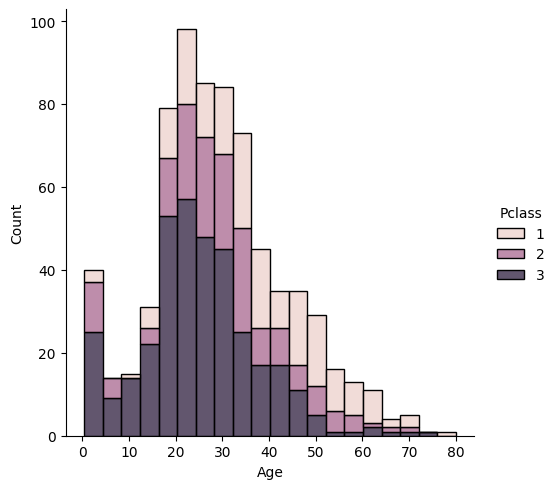

In [7]:
#Plotting histograms of some features with high correlation according to the "Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient").

    #displot: Is a figure-level function that plots one or more histograms on a grid object. In other words, it can be used to create multiple subplots with different subsets of the data.

    #hue : Semantic variable that is mapped to determine the color of plot elements. In other words, it is like a third element or feature in the histogram.

    #stat : could be {“count”, “frequency”, “probability”, “percent”, "density"} 
        #Aggregate statistic to compute in each bin.

    #multiple: could be {“layer”, “dodge”, “stack”, “fill”}
        #Approach to resolving multiple elements when semantic mapping creates subsets.

#Histograms of the features with the highest correlations with the target variable (i.e. "Survived")

sns.displot(training_data, x="Pclass", hue="Survived", multiple="stack",stat = "count")
sns.displot(training_data, x="Fare", hue="Survived", multiple="stack", stat = "count")

#Histograms of the features with the highest correlations with the feature "Pclass"

sns.displot(training_data, x="Fare", hue="Pclass", multiple="stack", stat = "count")
sns.displot(training_data, x="Age", hue="Pclass", multiple="stack", stat = "count")

# __5. Separating the Data - Training Dataset__

In [8]:
#Making a copy of the original training dataset.
training_data2 = training_data.copy()

#Separating the "features" from the "labels" (also called "target value") of the training dataset
    #Because we do not want to apply the same transformations to the "target values"and "features"
    #Dataframe with only the "features" of the training dataset
training_data2 = training_data2.drop("Survived", axis=1)

#Separating the "numerical features" from the "categorical features" of the training dataset
    #Dataframe with only the "numerical features" of the training dataset
training_data2_numfeatures = training_data2.drop(["Name","Sex","Ticket","Cabin","Embarked"], axis=1)

# __6. Data Cleaning - Training Dataset (only certain numerical features)__

From section "__2. Exploratory Data Analysis (EDA) - Training Dataset__" we know which attributes have NA values. They are the following:
> Age (numerical attribute)

> Cabin

> Embarked

Four options to deal with missing values in "Age (numerical attribute)". Those options are the followings:
1. __Option 1__: The dropna() method removes the rows that contains null values. 

2. __Option 2__: The "drop()" function is a drastic method in constrast with "dropna(), because it gets rid of the whole attribute (i.e. the entire column).

3. __Option 3__: The "fillna()" method replaces the null values with a specified value. 

4. __Option 4__: The scikit learn method called "SimpleImputer()". **This is the method that we are going to apply!**.

> Main goal: Replace missing values using the mean, median, most frequent or a constant value along each column.

**In conclusion, we are building an "ESTIMATOR / TRANSFORMER" (which contains a "HYPERPARAMETER"), that we are going to use in a future "PIPELINE"**

> **ESTIMATOR / TRANSFORMER: "SimpleImputer()"**

> **HYPERPARAMETER: "strategy = median"**

In [9]:
#Establishing the "imputer" and its "imputation strategy".
    #The "imputer" is the "estimator"
    #In this case the imputation strategy is "median" (this is the "hyperparameter")
    #In essence we are going to take all the "missing values" and replace them for the statistic "median value" of that column.
imputer = SimpleImputer(strategy = "median")

#Fitting the numerical data of the dataframe
    #In essence, we want to estimate a parameter ("median" value) based on the dataset.
    #"training_data2_numfeatures" was the output from section "5. Separating the Data - Training Dataset"
imputer.fit(training_data2_numfeatures)

#"imputer.statistics_" allows us to see the "median" values of each column of the analyzed dataframe.
    #If we had "missing values" in another known feature different from "Age" (in this particular case), this code would be useful. 
        #A "single underscore" at the end of an "estimator name" indicates that it is an attribute that is set during fitting and stores some information about the model or the data.
print('\033[1m','\033[94m',"Median values of each column",'\033[0m', "\n")
print(imputer.statistics_)

#Transforming the numerical data of the dataframe
    #Using the trained "imputer" we are going to replace the "missing values" of feature "Age" (in this particular case) with the learned "median" values.
print("\n",'\033[1m','\033[94m',"Transformed Training Dataset Array (after data cleaning)",'\033[0m', "\n")
training_data2_cleaned = imputer.transform(training_data2_numfeatures)
print(training_data2_cleaned)

#Printing the "Datatype of the Transformed Training Dataset for feature combination" (just to check!)
print("\n", '\033[1m','\033[94m',"Datatype of the Transformed Training Dataset Array (after data cleaning)",'\033[0m', "\n")
print(type(training_data2_cleaned))

  Median values of each column  

[446.       3.      28.       0.       0.      14.4542]

   Transformed Training Dataset Array (after data cleaning)  

[[  1.       3.      22.       1.       0.       7.25  ]
 [  2.       1.      38.       1.       0.      71.2833]
 [  3.       3.      26.       0.       0.       7.925 ]
 ...
 [889.       3.      28.       1.       2.      23.45  ]
 [890.       1.      26.       0.       0.      30.    ]
 [891.       3.      32.       0.       0.       7.75  ]]

   Datatype of the Transformed Training Dataset Array (after data cleaning)  

<class 'numpy.ndarray'>


# __7. Attribute Combination - Training Dataset (only certain numerical features)__

__A bit of theory about building "Custom Transformers" (to understand how it works for this specific problem)__:

__Part 0__

0. The indices ("1, 2, 5") are the indices of the features ("Pclass, Age, Fare") that we are going to combine. Those indices allow us to access the corresponding columns of the data X ("training_data2_numfeatures") when the "transform" method is used.

1. BaseEstimator: is the base class for all "estimators" in scikit-learn. It provides methods (which are useful for "hyperparameter" tuning) for getting and setting the "parameters" of the "estimator".

> In essence we are creating a "estimator"

2. TransformerMixin: is a mixin class for all "transformers" in scikit-learn. It provides the "fit_transform" method. 

> By inheriting from these two previous classes ("BaseEstimator" and "TransformerMixin"), a "custom transformer" can benefit from their methods and be compatible with other scikit-learn tools (pipelines, grid searches, and cross-validation)

3. "AttributeCombinator" is the name of our "custom class" (obviously, it can be any name) that inherits from the base classes "BaseEstimator" and "TransformerMixin".

4. Inside the newly created custom class ("AttributeCombinator"), we are going to define 3 basic "methods/functions". Those "methods/functions" are the followings:

> init

> fit

> transformer

5. The custom "class" ("AttributeCombinator") has a "parameter/hyperparameter" ("Combination1") - obviously, it can be any name - that will specify the type of feature combination that we want.

__Part 1 ("init" function)__

6. The "init" function is a special method/function that is automatically called when an "object" of the "class" ("AttributeCombinator") is created. It is used to initialize the "parameter/hyperparameter" ("Combination1") of the "object" ("Attribute_Comb"). 

> In the context of the current code, the "init" method of the class "AttributeCombinator" takes a "parameter" ("Combination1").

> The "init" method assigns the value of the "parameter/hyperparameter" ("Combination1") to an "attribute" ("self.Combination1"). 

7. "Self" is a parameter that refers to the current "object" ("Attribute_Comb") of a "class" ("AttributeCombinator") and is required for all "methods/functions" of a "class". It is used to access or modify the "attributes" ("self.Combination1") or "methods/functions" ("init", "fit", and "transform").

__Part 2 ("fit" function)__

8. The "fit" method/function does nothing and returns the "transformer object".

__Part 4 ("transformer" function)__

10. The "transform" method/function uses "self.Combination1" to generates feature combinations based on the input data and returns the transformed data.

> X[ : , Pclass] means to select all rows of the feature "Pclass" considering that X ("training_data2_numfeatures") is a dataframe.

11. The code "np.c_" it is a shorthand for "numpy.c_", which joins two arrays by columns, as long as they have the same number of rows. In our code it is applied to add new columns to our training dataset ("training_data2_numfeatures") based on the attribute combinations we have defined.

12. The code "training_data2_numfeatures.values" is used to convert the "training_data2_numfeatures" dataframe into a "numpy array". This is done because some sklearn functions (such as "preprocessing.scale"), require "numpy arrays" as inputs.

> Therefore, the output of the application of the newly created custom transformer will be a Numpy array despite the fact that the input data was a dataframe.

13. The "parameter/hyperparameter" ("Combination1"), is in this case a boolean "parameter/hyperparameter" that controls the number of feature combinations to apply. The "object" ("Attribute_Comb") is an instance of the class "AttributeCombinator" that is created by calling the "class" with a "value" ("False or True") for the "parameter/hyperparameter" ("Combination1").

**In conclusion, we are building an "ESTIMATOR / TRANSFORMER" (which contains a "HYPERPARAMETER"), that we are going to use in a future "PIPELINE"**

> **ESTIMATOR / TRANSFORMER: "AttributeCombinator()"**

> **HYPERPARAMETER: "Combination1"**


In [10]:
#Defining and building a custom transformer for "Attribute Combination"

#Listing the indices of the choosen features for the process of attribute combination (based on the "training_data2_numfeatures" which was output from section "5. Separating the Data - Training Dataset")
Pclass, Age, Fare= 1, 2, 5

#Creating a class
class AttributeCombinator(BaseEstimator, TransformerMixin):
    # Defining an "__init__" method to initialize any paramnters or attributes
    def __init__(self, Combination1=True):
        self.Combination1 = Combination1

    # Defining a "fit" method that returns self and does nothing else
    def fit(self, X, y=None):
        return self

    # Defining a "transform" method that performs some transformation (to be specific attribute combinations) on X and returns it
    def transform(self, X, y=None):
        
        #I use the code "try" and "except" to handle situations where the denominator of the division...
        #...is zero. As a result, whenever the denominator is zero, I prevent the "zerodivisionerror"...
        #...message from appearing and instead obtain a value of zero as the output for the division.
        try:
            fare_per_class = X[:, Fare] / X[:, Pclass]
        except ZeroDivisionError:
            fare_per_class = 0      
        try:
            age_per_class = X[:, Age]/ X[:, Pclass]
        except ZeroDivisionError:
            age_per_class = 0
            
        #The if-else statement helps to specify which feature combinations I want to see in the model.
            #In the "if statement", the code will add to the training set one feature combination ("fare_per_class")
        if self.Combination1:
            # np.c_[] concatenates arrays along second axis 
            # np.r_[] concatenates arrays along first axis
            return np.c_[X, fare_per_class]
        
            #In the "else statement", the code will add to the training set two feature combinations ("fare_per_class" and "age_per_class")
        else:
            return np.c_[X, fare_per_class, age_per_class]

#Creating an object
    #If the hyperparameter ("Combination1") is set "True", then the applied code will be the "if-statement".
    #If the hyperparameter ("Combination1") is set "False", then the applied code will be the "else-statement".
    #IMPORTANT 1: I choose the option of only one attribute combination (fare_per_class) setting "Combination1=True" in the "transfom" method/function.
    #IMPORTANT 2: It will depend of the results of the model if I change my mind about the type of attribute combinations to choose.
Attribute_Comb = AttributeCombinator(Combination1=True)

#Creating a Numpy array
    #Using the dataframe called "training_data2_numfeatures" which was output from section "5. Separating the Data - Training Dataset
    # DataFrame.values : return a numpy array of the DataFrame
    # 利用物件Attribute_Comb內的函數transform擴充資料
Training_Data_Extra_Attributes = Attribute_Comb.transform(training_data2_numfeatures.values)

#Printing "Transformed Training Dataset" after "attribute combination"
    #We can see that there is an additional column at the end of the array
print('\033[1m','\033[94m',"Transformed Training Dataset Array (after attribute combination)",'\033[0m', "\n")
print(Training_Data_Extra_Attributes)

#Printing the "Datatype of the Transformed Training Dataset after attribute combination" (just to check!)
print("\n", '\033[1m','\033[94m',"Datatype of the Transformed Training Dataset (after attribute combination)",'\033[0m', "\n")
print(type(Training_Data_Extra_Attributes))

  Transformed Training Dataset Array (after attribute combination)  

[[  1.           3.          22.         ...   0.           7.25
    2.41666667]
 [  2.           1.          38.         ...   0.          71.2833
   71.2833    ]
 [  3.           3.          26.         ...   0.           7.925
    2.64166667]
 ...
 [889.           3.                  nan ...   2.          23.45
    7.81666667]
 [890.           1.          26.         ...   0.          30.
   30.        ]
 [891.           3.          32.         ...   0.           7.75
    2.58333333]]

   Datatype of the Transformed Training Dataset (after attribute combination)  

<class 'numpy.ndarray'>


# __8. Feature Scaling - Training Dataset (only certain numerical features)__

1. Many ML algorithms are highly sensitive or do not work well when the features of the model (independent variables) have different scales (for instance: a feature has values between 3 and 7, other feature has values between 400 and 1000 and another feature of the same model has values between 10000 and 500000). Therefore, applying "Feature Scaling" (i.e. a transformation) allows us to normalize the features and makes ML problems easy to address by ML algorithms.

> Based in what we see in the section __2. Exploratory Data Analysis (EDA) - Training Dataset__ we considered apply "feature scaling".

2. It is recommended to apply the "Feature Scaling" procedure after the processes of "Attribute Combination" and "Encoding Categorial/Text Attributes".

3. ML algorithms (for instance: linear regression, logistic regression, PCA, ANN,...) that use "Gradient Descent" as an optimization technique should be checked with "Feature Scaling" because in that way we are able to guarantee a regular size steps during the gradient descent process and properly convergence.

4. Distance-based ML algorithms (for instance: SVM, KNN, K-means...) should be checked with "Feture Scaling" because they use distance between data points to show similarity between them.

5. There are several ways to apply "Feature Scaling"; however, we are going to see the following two:

5.1. __Normalization (also called "Min - Max Scaling")__ <-- <span style="color:black">__This option is NOT DONE in this Notebook.__</span> 

> It adjusts the values of the features (numeric features) to end up ranging between 0 and 1.

> It is sensitive to outliers points, because Normalization formula works with "maximun" and "minimun" values of the feature.

> It is useful when the features have data distributions that do not follow a Gaussian Distribution or when there is no assumption about the data distributions of features.

> It can be useful in "Encoded Categorial/Text Attributes" (One-Hot Encoding).

5.2. __Standardization (also called "Z-Score Normalization")__ 

> It adjusts the values of the features (numeric features) to end up ranging between no specific values. It standardize values to have mean value equal to 0 and standard deviation of 1.

> It is not sensitive to outliers in the data, because Standardization formula works with the "mean" and the "standard deviation" value of each the feature.

> It is useful when the features have data distributions that looks (more or less) like a Gaussian Distribution.

6. Feature scaling can affect both the "features" and the "parameters" of our model, depending on the type of scaling and the type of model (linear models, non-linear models, ...)

7. Despite the conditions described previously, I would recommend train the ML algorithm using the "raw training data", "normalize training data", and "standardize training data". Then, check and compare the peformance of each model with error analysis.

**In conclusion, we are building an "ESTIMATOR / TRANSFORMER", that we are going to use in a future "PIPELINE"**

> **ESTIMATOR / TRANSFORMER: "StandardScaler()"**

In [11]:
#Fitting the numerical data of the dataframe
    #In essence, we want to estimate parameters ("mean" and "variance" value) based on the numerical training dataset.
    #"training_data2_numfeatures" was the output from section "5. Separating the Data - Training Dataset"
scaler = StandardScaler().fit(training_data2_numfeatures)

#Transforming the numerical data of the dataframe
    #Using the trained "scaler" we are going to apply the feature scaling (standardization of the numerical data).
print("\n",'\033[1m','\033[94m',"Transformed Training Dataset Array (after data scaling)",'\033[0m', "\n")
training_data2_scaled = scaler.transform(training_data2_numfeatures)
print(training_data2_scaled)

#Printing the "Datatype of the Transformed Training Dataset (after data scaling)" (just to check!)
print("\n", '\033[1m','\033[94m',"Datatype of the Transformed Training Dataset Array (after data scaling)",'\033[0m', "\n")
print(type(training_data2_scaled))


   Transformed Training Dataset Array (after data scaling)  

[[-1.73010796  0.82737724 -0.53037664  0.43279337 -0.47367361 -0.50244517]
 [-1.72622007 -1.56610693  0.57183099  0.43279337 -0.47367361  0.78684529]
 [-1.72233219  0.82737724 -0.25482473 -0.4745452  -0.47367361 -0.48885426]
 ...
 [ 1.72233219  0.82737724         nan  0.43279337  2.00893337 -0.17626324]
 [ 1.72622007 -1.56610693 -0.25482473 -0.4745452  -0.47367361 -0.04438104]
 [ 1.73010796  0.82737724  0.15850313 -0.4745452  -0.47367361 -0.49237783]]

   Datatype of the Transformed Training Dataset Array (after data scaling)  

<class 'numpy.ndarray'>


# __9. Handling Text and Categorical Attributes - Training Dataset (only one categorical attribute)__

Using the technique "One-Hot Encoding" we are going to deal with "text and categorical attributes" (considering that most ML algorithms use to work better with numeric values only).

Based on section __2. Exploratory Data Analysis (EDA) - Training Dataset__ we have the following:

> The "categorical attributes" in our training dataset are: "Sex" and "Embarked".

> The "text attributes" in our training dataset are: "Name", "Ticket", "Cabin".

The categorical attribute "Sex" is the choosen one to be "transformed or encoded" from "categories" into "numbers".

More information about the technique "One-Hot Encoding":

> "One-Hot Encoding" creates a binary system (with the values 0 or 1) per category. If the category is chosen, then it will have the value 1 (one); therefore, all the other categories will have the value 0 (zero).

> 1 (one) is hot and 0 (zero) is cold.

> The output of the "One-Hot Encoding" procedure is a huge matrix full of zeros and just a couple of ones (per category). This type of matrix is known as "Sparse Matrix".

**In conclusion, we are building an "ESTIMATOR / TRANSFORMER", that we are going to use in a future "PIPELINE"**

> **ESTIMATOR / TRANSFORMER: "OneHotEncoder()"**


In [12]:
#Separating the categorical attribute "Sex" from the training dataset.
    #In this case a establishing a 2D array that is going to be used in the in the OneHotEncoder() transformer.
    #"training_data2" was an input in the section "5. Separating the Data - Training Dataset"
training_data2_sex = training_data2[["Sex"]]

#Applying "One-Hot Encoding" to the feature "Sex" of the training data set
    #The ouput will be the following:
        #A sparse matrix (891 rows)
        #CSR(Compressed Sparse Row) is a type of Scipy sparse matrix  
sex_encoder = OneHotEncoder()
training_data2_OneHotencode = sex_encoder.fit_transform(training_data2_sex)

#Transforming the "Scipy Sparse Matrix" into a "Dense Numpy Array"
    #The ouput will be the following:
        #Two columns of binary values in the array because there are only 2 categories (in this case "female, male").
        #The columns in the array are returned alphabetically (in this case "female, male").
print("\n", '\033[1m','\033[94m',"Dense Numpy Array of the feature sex (handling categorical attributes)",'\033[0m', "\n")
print(training_data2_OneHotencode.toarray())

#Printing the "Datatype of the Transformed Training Dataset for handling categorical attributes" (just to check!)
print("\n", '\033[1m','\033[94m',"Datatype of the Dense Numpy Array of the feature sex (after handling categorical attributes)",'\033[0m', "\n")
print(type(training_data2_OneHotencode.toarray()))


   Dense Numpy Array of the feature sex (handling categorical attributes)  

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]

   Datatype of the Dense Numpy Array of the feature sex (after handling categorical attributes)  

<class 'numpy.ndarray'>


# __10. Transformation Pipelines__

## __10.1 Training Dataset (only certain numerical features)__

In the previous steps were done the following transformations to the training dataset:

> 6. Data Cleaning - Training Dataset (only certain numerical features)

> 7. Attribute Combination - Training Dataset (only certain numerical features)

> 8. Feature Scaling - Training Dataset (only certain numerical features)

> 9. Handling Text and Categorical Attributes - Training Dataset

Considering the listed transformations, we can save plenty of time using "**Transformation Pipelines**" which allow us to execute transformations of data in the right order with just a few lines of code.

More information about "**Transformation Pipelines**": 

1. The order of transformations in the Pipeline matters.

> The output of one "estimator" pass to next "estimator" until reach the final "estimator".

> The final "estimator" must be a "transformer", i.e., must have  a "fit_transform()" method.

2. The pair ("name","estimator"(hyperparamenter))  are defined for every transformation. 

> The "hyperparameter" depends of the "estimator".

In conclusion, the entire codes/comments of section "**6. Data Cleaning - Training Dataset (only certain numerical features)**" and section "**8. Feature Scaling - Training Dataset (only certain numerical features)**" were a **waste of time considering that a "**Transformation Pipelines**" do the same in just a few lines of code.

In [13]:
#Defining the data that is going to used in the pipeline
    #"training_data2_numfeatures" was the output from section "5. Separating the Data - Training Dataset"
    #The only categorical attribute of interest is ["Sex"]

#Defining the pipeline
    #The pair ("name","estimator"("hyperparameter")  are defined for every transformation.    
    #Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement 
    #``fit`` and ``transform`` methods. The final estimator only needs to implement ``fit``. 
    # The transformers in the pipeline can be cached using ``memory`` argument.
numerical_pipeline = Pipeline([("imputer", SimpleImputer(strategy = "median")),
                       ("Attribute_Comb", AttributeCombinator(Combination1=False)),
                       ("scaler", StandardScaler())])

#Applying the transformation through the pipeline
num_pipeline_transformation = numerical_pipeline.fit_transform(training_data2_numfeatures)

#Printing the "Array of certain numerical features (transformed by pipeline)" (just to check!)
print("\n", '\033[1m','\033[94m',"Array of certain numerical features (transformed by pipeline)",'\033[0m', "\n")
print(num_pipeline_transformation)

#Printing the "Datatype of the Array of certain numerical features (transformed by pipeline)" (just to check!)
print("\n", '\033[1m','\033[94m',"Datatype of the Array of certain numerical features (transformed by pipeline)",'\033[0m', "\n")
print(type(num_pipeline_transformation))

#Printing the "Shape of the Array of certain numerical features (transformed by pipeline)" (just to check!)
    #If we set the hyperparameter "Combination1 = True" we are going to see 7 columns on the final transformed dataset.
        #Columns:
            #PassengerId
            #Pclass
            #Age
            #SibSp
            #Parch
            #Fare
            #fare_per_class
    #If we set the hyperparameter "Combination1 = False" we are going to see 8 columns on the final transformed dataset.
        #Columns:
            #PassengerId
            #Pclass
            #Age
            #SibSp
            #Parch
            #Fare
            #fare_per_class
            #age_per_class
print("\n", '\033[1m','\033[94m',"Shape of the Array of certain numerical features (transformed by pipeline)",'\033[0m', "\n")
print(num_pipeline_transformation.shape)


   Array of certain numerical features (transformed by pipeline)  

[[-1.73010796  0.82737724 -0.56573646 ... -0.50244517 -0.44184663
  -0.66748321]
 [-1.72622007 -1.56610693  0.66386103 ...  0.78684529  0.90276285
   1.5037077 ]
 [-1.72233219  0.82737724 -0.25833709 ... -0.48885426 -0.43745355
  -0.57308361]
 ...
 [ 1.72233219  0.82737724 -0.1046374  ... -0.17626324 -0.33641254
  -0.5258838 ]
 [ 1.72622007 -1.56610693 -0.25833709 ... -0.04438104  0.09671333
   0.65411126]
 [ 1.73010796  0.82737724  0.20276197 ... -0.49237783 -0.4385925
  -0.4314842 ]]

   Datatype of the Array of certain numerical features (transformed by pipeline)  

<class 'numpy.ndarray'>

   Shape of the Array of certain numerical features (transformed by pipeline)  

(891, 8)


## __10.2 Training Dataset (only certain numerical features + only certain categorical attribute)__

In [14]:
#Defining the data that is going to used in the pipeline
    #"training_data2_numfeatures" was the output from section "5. Separating the Data - Training Dataset"
    #The only categorical attribute of interest is ["Sex"]
numerical_features = list(training_data2_numfeatures)
category_attributes = ["Sex"]

#Defining the pipeline
    #The triplet ("name","estimator","data")  are defined for every transformation. 
full_pipeline = ColumnTransformer([
    ("numerical",numerical_pipeline,numerical_features),
    ("categorical",OneHotEncoder(),category_attributes)    
])

#Applying the transformation through the pipeline
training_fullprepared = full_pipeline.fit_transform(training_data2)

#Printing the "Array of certain numerical + categorical feature (transformed by pipeline)" (just to check!)
print("\n", '\033[1m','\033[94m',"Array of certain numerical + categorical feature (transformed by full pipeline)",'\033[0m', "\n")
print(training_fullprepared)

#Printing the "Type of the Array of certain numerical + categorical feature (transformed by pipeline)" (just to check!)
print("\n", '\033[1m','\033[94m',"Datatype of the Array of certain numerical + categorical feature (transformed by full pipeline)",'\033[0m', "\n")
print(type(training_fullprepared))

#Printing the "Shape of the Array of certain numerical + categorical features (transformed by pipeline)" (just to check!)
    #If we set the hyperparameter "Combination1 = True" we are going to see 9 columns on the final transformed dataset.
        #Columns:
            #PassengerId
            #Pclass
            #Age
            #SibSp
            #Parch
            #Fare
            #fare_per_class
            #Sex (male)
            #Sex (females)
    #If we set the hyperparameter "Combination1 = False" we are going to see 10 columns on the final transformed dataset.
        #Columns:
            #PassengerId
            #Pclass
            #Age
            #SibSp
            #Parch
            #Fare
            #fare_per_class
            #age_per_class
            #Sex (male)
            #Sex (females)
print("\n", '\033[1m','\033[94m',"Shape of Array of certain numerical + categorical feature (transformed by full pipeline)",'\033[0m', "\n")
print(training_fullprepared.shape)


   Array of certain numerical + categorical feature (transformed by full pipeline)  

[[-1.73010796  0.82737724 -0.56573646 ... -0.66748321  0.
   1.        ]
 [-1.72622007 -1.56610693  0.66386103 ...  1.5037077   1.
   0.        ]
 [-1.72233219  0.82737724 -0.25833709 ... -0.57308361  1.
   0.        ]
 ...
 [ 1.72233219  0.82737724 -0.1046374  ... -0.5258838   1.
   0.        ]
 [ 1.72622007 -1.56610693 -0.25833709 ...  0.65411126  0.
   1.        ]
 [ 1.73010796  0.82737724  0.20276197 ... -0.4314842   0.
   1.        ]]

   Datatype of the Array of certain numerical + categorical feature (transformed by full pipeline)  

<class 'numpy.ndarray'>

   Shape of Array of certain numerical + categorical feature (transformed by full pipeline)  

(891, 10)


<div class="alert alert-block alert-info"><b>Points 11 and 12:</b> In the following steps, we are going to apply several techniques, methods, or procedures to train and evaluate the training dataset. In addition, we will evaluate the test set.</div>

## <span style="color:red">__IMPORTANT: This is an Unfinished Notebook (I am still working on it!)__</span>

# __11. Training and Evaluation of the Models - Training Dataset__

In [15]:
#Array of certain numerical + categorical feature (transformed by full pipeline)
    #Then we transform this array into a dataframe (transformed by full pipeline)
x_training = pd.DataFrame(training_fullprepared)

print("\n", '\033[1m','\033[94m',"Shape of Dataframe of certain numerical + categorical feature (transformed by full pipeline)",'\033[0m', "\n")
print(x_training.shape)

#Dataframe of the feature "Survived" (i.e., the "target value" of the training set)
y_training = (training_data["Survived"])

print("\n", '\033[1m','\033[94m',"Shape of Dataframe of target value (training set)",'\033[0m', "\n")
print(y_training.shape)


   Shape of Dataframe of certain numerical + categorical feature (transformed by full pipeline)  

(891, 10)

   Shape of Dataframe of target value (training set)  

(891,)


In [16]:
#Applying Logistic Regression
logistic_reg = LogisticRegression()

    #Fitting the model on the training set
logistic_reg.fit(x_training, y_training)

    #Predicting the labels on the training set
y_prediction = logistic_reg.predict(x_training)

print("\n", '\033[1m','\033[94m',"Datatype of the Array of the prediction values (training set)",'\033[0m', "\n")
print(type(y_prediction))

print("\n", '\033[1m','\033[94m',"Shape of the Array of the prediction values (training set)",'\033[0m', "\n")
print(y_prediction.shape)


   Datatype of the Array of the prediction values (training set)  

<class 'numpy.ndarray'>

   Shape of the Array of the prediction values (training set)  

(891,)


In [17]:
from sklearn.metrics import accuracy_score
print("Training accuracy: ", accuracy_score(y_training, y_prediction))

Training accuracy:  0.7934904601571269


In [18]:
from sklearn.metrics import log_loss
# Evaluate the model performance using log-loss
print("Training log-loss: ", log_loss(y_training, y_prediction))

Training log-loss:  7.132662202971608


# __12. Evaluation of the Model - Test Dataset__